## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

### We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### `1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

**a. Read in the dataset and take a look at the top few rows here:**

In [3]:
df = pd.read_csv('ab_data.csv')

**b. Use the below cell to find the number of rows in the dataset.**

In [4]:
print('Number of rows is: [',df.shape[0],']')

Number of rows is: [ 294478 ]


**c. The number of unique users in the dataset.**

In [5]:
method1 = df['user_id'].nunique()
method2 = df.shape[0]- sum(df['user_id'].duplicated())
print('Number of unique users is: \n Method#1: [', method1 ,']\n Method#2: [', method2 ,']')

Number of unique users is: 
 Method#1: [ 290584 ]
 Method#2: [ 290584 ]


**d. The proportion of users converted.**

In [6]:
method1 = round(df['converted'].mean()*100,2)
method2 = round(df['converted'].sum()/df.shape[0]*100,2)
print('The proportion of users is: \n Method#1: [', method1 ,'%]\n Method#2: [', method2 ,'%]')

The proportion of users is: 
 Method#1: [ 11.97 %]
 Method#2: [ 11.97 %]


**e. The number of times the `new_page` and `treatment` don't line up.**

In [7]:
value = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]
print('The number of times the "new_page" and "treatment" don\'t line up is: [', value ,']')

The number of times the "new_page" and "treatment" don't line up is: [ 3893 ]


**f. Do any of the rows have missing values?**

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

The answer is: "No"

### `2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

**a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
### Create a subset dataframe using profided conditions:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))
           |((df['group'] == 'control') == (df['landing_page'] == 'old_page'))]
df2.shape


(290585, 5)

In [10]:
### Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### `3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

**a. How many unique user_ids are in df2?**

In [11]:
method1 = df2['user_id'].nunique()
method2 = df2.shape[0]- sum(df2['user_id'].duplicated())
print('Number of unique "user_id"s is: \n Method#1: [', method1 ,']\n Method#2: [', method2 ,']')

Number of unique "user_id"s is: 
 Method#1: [ 290584 ]
 Method#2: [ 290584 ]


**b. There is one user_id repeated in df2.  What is it?**

In [12]:
method1 = df2.shape[0] - df2['user_id'].nunique()
method2 = sum(df2['user_id'].duplicated())
print('Number of duplicated "user_id"s is: \n Method#1: [', method1 ,']\n Method#2: [', method2 ,']')

print('\nThe duplicated raw in "user_id" column is:', df2[df2['user_id'].duplicated()]['user_id'])



Number of duplicated "user_id"s is: 
 Method#1: [ 1 ]
 Method#2: [ 1 ]

The duplicated raw in "user_id" column is: 2893    773192
Name: user_id, dtype: int64


**c. What is the row information for the repeat user_id?**

In [13]:
### Find duplicated raw's details :
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d. Remove one of the rows with a duplicate user_id, but keep your dataframe as df2**.

In [14]:
### Drop duplicated value by row number:
df2.drop(2893, inplace=True)
df2.shape[0]

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


290584

### `4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

**a. What is the probability of an individual converting regardless of the page they receive?**

In [15]:
print('The probability is: [', round(df2['converted'].mean()*100,2),'% ]')

The probability is: [ 11.96 % ]


**b. Given that an individual was in the `control` group, what is the probability they converted?**

In [16]:
print('The probability is: [', round(df2[df2['group'] == 'control']['converted'].mean()*100,2),'% ]')

The probability is: [ 12.04 % ]


**c. Given that an individual was in the `treatment` group, what is the probability they converted?**

In [17]:
print('The probability is: [', round(df2[df2['group'] == 'treatment']['converted'].mean()*100,2),'% ]')

The probability is: [ 11.88 % ]


**The difference between indiviuals probabilities:**

In [18]:
prob_diff = df2[df2['group'] == 'treatment']['converted'].mean() - df2[df2['group'] == 'control']['converted'].mean()
print('The probability is: [', round(prob_diff*100,2),'% ]')

The probability is: [ -0.16 % ]


**d. What is the probability that an individual received the new page?**

In [19]:
print('The probability is: [', round(((df2['landing_page'] == 'new_page').mean())*100,2),'% ]')

The probability is: [ 50.01 % ]


**e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.**

Above analysis shows that the rate of individual converting for the `Control` group is [**12.04%**], which is slightly higher than the `Treatment` group that has [**11.88%**] ratio. Given these ratios only won't helps to conclusively determine if the new page is the main reason for the conversions. This conclusion is also supported by the last result which shows that [**50.01%**] of the landing pages was the new page, while the actual persantage of the overall conversions is only [**11.96%**]. 

<a id='ab_test'></a>
### Part II - A/B Test

`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Study's hypotheses are:  **$H_{0}$**: **$p_{new}$** - **$p_{old}$** =< 0 & **$H_{1}$**: **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

a. What is the **convert rate** for $p_{new}$ & $p_{old}$ under the null? 

In [27]:
p_old = df2[df2['group'] == 'control']['converted'].mean()
print('The convert rate for the old group is: [', round(p_old*100,2) ,'%]')

p_new = df2[df2['group'] == 'treatment']['converted'].mean()
print('The convert rate for the new group is: [', round(p_new*100,2) ,'%]')


The convert rate for the old group is: [ 12.04 %]
The convert rate for the new group is: [ 11.88 %]


c. What is $n_{new}$?

In [28]:
n_new = df2.query("group == 'treatment'").shape[0]
print('The n_new value is: [', n_new ,']')

The n_new value is: [ 145310 ]


d. What is $n_{old}$?

In [29]:
n_old =df2.query("group == 'control'").shape[0]
print('The n_old value is: [', n_old ,']')

The n_old value is: [ 145274 ]


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
new_page_converted = np.random.choice([1, 0], size= n_new, p= [p_new,(1-p_new)])
new_mean = new_page_converted.mean()
print('The New page converted mean is: [', round(new_mean*100,2)  ,'%]')

The New page converted mean is: [ 11.75 %]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = np.random.choice([1, 0], size= n_new, p= [p_old,(1-p_old)])
old_mean = old_page_converted.mean()
print('The Old page converted mean is: [', round(old_mean*100,2)  ,'%]')

The Old page converted mean is: [ 11.95 %]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
diff = new_mean - old_mean
print('The difference between the simulated values is: [', round(diff*100,2) ,'%]')

The difference between the simulated values is: [ -0.19 %]


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [43]:
### Simulate P values:  
p_diffs = []
for _ in range(10000):
    new_mean = np.random.choice([0, 1], size= n_new, p= [p_new,(1-p_new)]).mean()
    old_mean = np.random.choice([0, 1], size= n_old, p= [p_old,(1-p_old)]).mean()
    p_diffs.append(new_mean - old_mean)

### convers p_diffs into numpy array:    
p_diffs = np.asarray(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

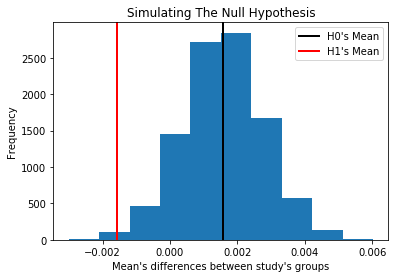

In [44]:
plt.title('Simulating The Null Hypothesis')
plt.xlabel("Mean's differences between study's groups")
plt.ylabel('Frequency')
plt.axvline(x=np.array(p_diffs).mean(), color='k', linewidth=2, label="H0's Mean")
plt.axvline(x=prob_diff, color='r', linewidth=2, label="H1's Mean")
plt.legend()
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [45]:
### Calculating the P-value:
(prob_diff < p_diffs).mean()

0.9951

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The p-value is used to indicate if there is a huge difference between the invloved groups in the study. As shown here, it's equal to `0.9068` which is way too large than the suggested alpha `0.05`. This means we failed to reject the null hyptohesis; on other words, the new page doesn't have better conversion rates than the old one**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.


In [46]:
import statsmodels.api as sm
from scipy.stats import norm

convert_old = df2.query("group == 'control'").converted.sum()
print('# The the number of conversions in control group is: [', convert_old  ,']')

convert_new = df2.query("group == 'treatment'").converted.sum()
print('# The the number of conversions in treatment group is: [', convert_new  ,']')

n_old = df2.query("landing_page == 'old_page'").shape[0]
print('# The number of rows associated with the old page is: [', n_old  ,']')

n_new = df2.query("landing_page == 'new_page'").shape[0]
print('# The number of rows associated with the new page is: [', n_new  ,']')


z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print('# The calculated p-value using ZTest is: [', round(p_value,2) ,']')
print('# The calculated z_score using ZTest is: [', round(z_score,2)  ,']')

print('# The confidence of the calculated z_score is: [', round(norm.cdf(z_score),2)  ,']')
print('# The critical value at 95% confidence intervals is: [ +/-', round(norm.ppf(1-(0.05/2)),2)  ,']')

# The the number of conversions in control group is: [ 17489 ]
# The the number of conversions in treatment group is: [ 17264 ]
# The number of rows associated with the old page is: [ 145274 ]
# The number of rows associated with the new page is: [ 145310 ]
# The calculated p-value using ZTest is: [ 0.91 ]
# The calculated z_score using ZTest is: [ 1.31 ]
# The confidence of the calculated z_score is: [ 0.91 ]
# The critical value at 95% confidence intervals is: [ +/- 1.96 ]


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z_score is `1.31` which falls within our confidence intervals `[-1.96,+1.96]` and also the p-value `0.91` is way greater that `0.05`, thus we fail to reject our null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

[**Logistic regression**](https://en.wikipedia.org/wiki/Logistic_regression)

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [65]:
### Add Intercept Column: 
df2['intercept']=1

### Add Dummies Columns: 
df2[['control','ab_page']] = pd.get_dummies(df2['group'])

### Since control values can be obtained from 'ab_page' values, we no longer need 'control' column
df2.drop(labels=['control'], axis=1, inplace=True)
df2.head()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [81]:
### Import the Regression Model:
import statsmodels.api as sm

### Instantiate the Model:
logistic_modle = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

### Fitting the Model:
result = logistic_modle.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [83]:
### Obtaining the Result:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Jun 2019   Pseudo R-squ.:               8.077e-06
Time:                        13:21:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**In PartII, the hypotheses were: $H_{0}$: $p_{new}$ - $p_{old}$ =< 0 & $H_{1}$: $p_{new}$ - $p_{old}$ > 0** (p-value = [0.9] > 0.05)

**In PartIIT, the hypotheses are: $H_{0}$: $p_{new}$ - $p_{old}$ = 0 & $H_{1}$: $p_{new}$ - $p_{old}$ != 0** (p-value = [0.19] > 0.05)

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**We should consider other factors that might influence whether or not an individual converts.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [74]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [75]:
### Joining the New Columns witht the file:
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [77]:
### Add Dummies Columns: 
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [85]:
### Fitting the Model And Obtaining the Results:
logistic_modle = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'US']])
results = logistic_modle.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Jun 2019   Pseudo R-squ.:               1.521e-05
Time:                        13:22:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

In conclusion, the result of both A/B testing and Regression study shows the following: 
- There is no sufficient evidence to indicate that the new page will result in more conversion rate than the old page. Therefore, the Null Hypothesis ($H_{0}$) should be accepted and the Alternate Hypothesis ($H_{1}$) should be rejected.
- The company shouldn't implement the new page as it will not add a significant value to its business. 